In [1]:
# Read the text files of Citigroup's, JP Morgan's, and Bank of America's Q4 earnings calls

filename = 'citi.txt'
file = open(filename, 'rt')
text_citi = file.read()
file.close()
filename = 'jpm.txt'
file = open(filename, 'rt')
text_jpm = file.read()
file.close()
filename = 'bofa.txt'
file = open(filename, 'rt')
text_bofa = file.read()
file.close()

# Join the transcripts together
transcripts = [text_citi, text_jpm, text_bofa]
text_banks = " ".join(transcripts)

In [2]:
# import NLTK (Natural Language Toolkit), a Python library for examining english text
# use tokenize package to split at punctuation other than periods and white space
# remove stop words from text, which are commonly used words which won't help us derive meaning/value from analysis
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

In [3]:
# split into words
tokens = word_tokenize(text_banks)

In [4]:
# lowercase all words because default_stopwords are lowercase too
words = [word.lower() for word in tokens]

In [5]:
# remove from tokens any unwanted characters and punctuation
words = [x for x in words if len(x) >2]
# remove numbers
words = [w for w in words if not w.isnumeric()]

# create variable for NLTK stopwords
stopwords_eng = set(nltk.corpus.stopwords.words('english'))
# remove stopwords
words = [word for word in words if word not in stopwords_eng]
# remove names, terms that show up in a transcript that aren't useful for analysis
terms = ['mike','corbat','susan','kendall','operator','mark','mason','john','gerspach','jamie','dimon',"'ve","n't",
        'marianne','lake','brian','moynihan','lee','mcentire','paul','donofrio',"'re",'quarter', 'would',"'ll"
         'see','fourth','like','say','look','going','question', 'one','saw','much','lot','said',
         'got','right','citi','morgan','slide','bit','put','transcript','inc.','copyright','yes','pretty',
        'january','thank','want','give','citigroup','morning','alse','get','year','billion','million','thing',
        'really','back','talked','think','well','morning','good','year-over-year', 'given', 'still','kind', 'things',
        'also','actually','way','sort','looking','could','betsy','graseck','see','last','little','first']
# remove other terms
words = [word for word in words if word not in terms]

In [6]:
# let's combine revenues and revenue to just revenue, rates --> rate. 
# Done manually bec nltk Stemming was not helpful
words = list(map(lambda word: word.replace('revenues', 'revenue'),words))
words = list(map(lambda word: word.replace('rates', 'rate'),words))

In [7]:
# Check top words so far
# Calculate frequency distribution
fdist = nltk.FreqDist(words)
# Output top 10 words
for word, frequency in fdist.most_common(15):
    print(u'{};{}'.format(word, frequency))

growth;211
revenue;198
rate;160
business;114
market;106
net;105
credit;93
consumer;76
lower;74
basis;73
loan;71
banking;69
markets;66
income;65
grew;63


In [8]:
#import wordcloud and matplotlib for chart
from wordcloud import WordCloud, STOPWORDS
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (18.0, 15.0)

In [9]:
# create string of words list so that WordCloud can be created
words_string = " ".join(str(x) for x in words)

(-0.5, 1599.5, 899.5, -0.5)

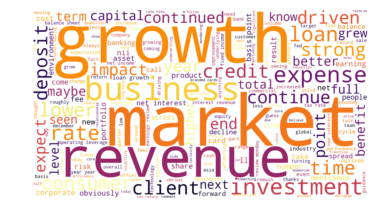

In [10]:
# remove any other stopwords we might have missed
other_stopwords = set(STOPWORDS)
# create WordCloud Object
wc = WordCloud(background_color="white", stopwords=other_stopwords,
               width=1600, height=900, colormap=matplotlib.cm.inferno)
# Generate WordCloud
wc.generate(words_string)
# Show the WordCloud
plt.figure()

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

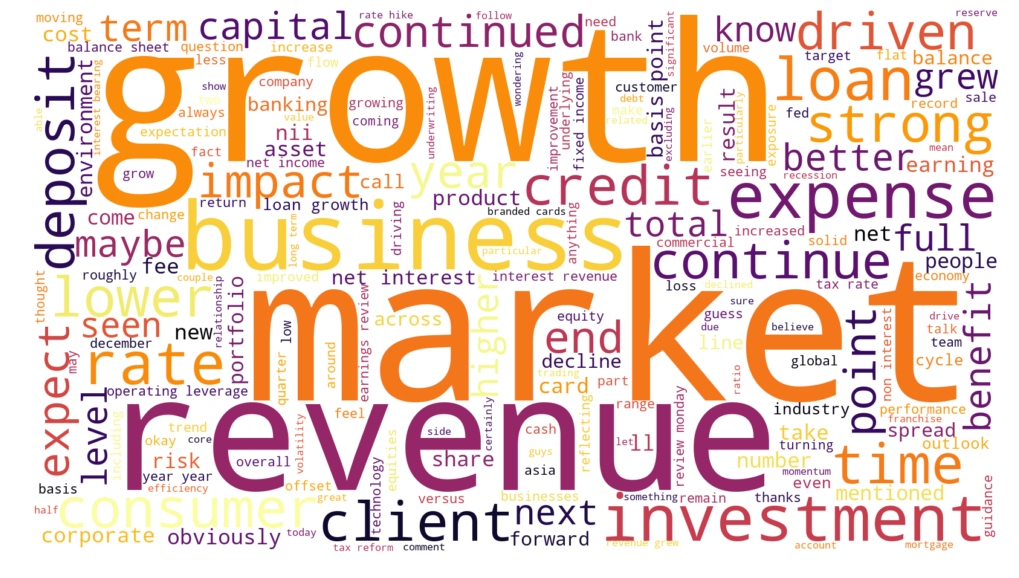

In [11]:
# Larger view, and save into jpg file
plt.figure( figsize=(20,10) )
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.savefig('banks1.jpg', format='jpg', dpi=600)

This world cloud is what I would expect when examining the transcripts of banks earnings calls.  Growth, business, revenue, market, investment, credit, loans, and rate are terms used to descibe and report bank performance. I will remove a few more terms to see if we can gather any more insight from these earnings calls.

In [12]:
# Batch number 2 of terms to remove. Focusing on expected terms in an earnings call
more_terms = ['growth','grew','business','lower','banking','know','first','obviously','new','income','earnings',
             'mentioned','revenue','market','investment','expense','maybe','little','strong','credit','take','next',
             'continue','continued', 'time','loan','rate','client','deposit', 'driven','year','end',
             'higher', 'impact','expect','number','full','better','okay','remain','feel','december', 'markets','net',
              'years','investments','line','cost','costs','long','short','term','terms', 'seen','result','results',
             'come','share','across','seeing','businesses','basis','point','one','some','level','benefit','total',
              'tax','yearoveryear', 'monday','roughly','take','always','including','something','environment',"'ll"]
words_edit = [word for word in words if word not in more_terms]

In [13]:
# Check top words so far
# Calculate frequency distribution
fdist = nltk.FreqDist(words_edit)
# Output top 10 words
for word, frequency in fdist.most_common(15):
    print(u'{};{}'.format(word, frequency))

consumer;76
deposits;54
capital;53
interest;53
operating;51
loans;51
assets;48
leverage;43
points;42
balance;42
offset;42
corporate;39
lending;38
global;38
expenses;37


using nltk and text parsing is not perfect as there is still "'ll" included. 

In [14]:
# create string of words list so that WordCloud can be created
words_string_edit = " ".join(str(x) for x in words_edit)

(-0.5, 1599.5, 899.5, -0.5)

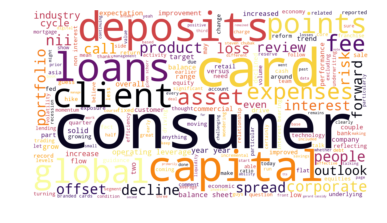

In [15]:
# remove any other stopwords we might have missed
other_stopwords = set(STOPWORDS)
# create WordCloud Object
wc = WordCloud(background_color="white", stopwords=other_stopwords,
               width=1600, height=900, colormap=matplotlib.cm.inferno)
# Generate WordCloud
wc.generate(words_string_edit)
# Show the WordCloud
plt.figure()

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

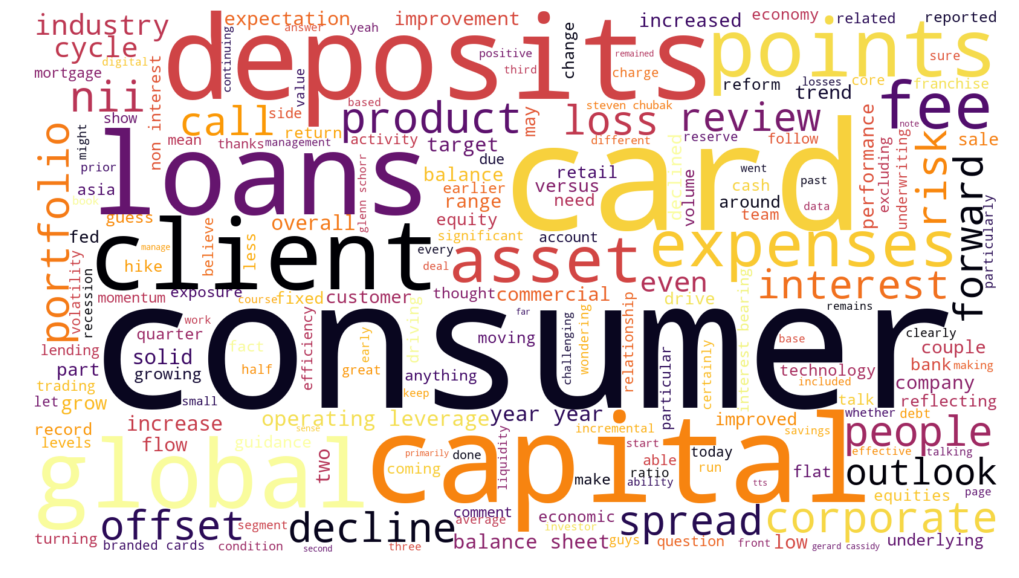

In [16]:
plt.figure( figsize=(20,10) )
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.savefig('banks2.jpg', format='jpg', dpi=600)

This is much better. Some terms are really standing out that are useful. "Capital" might refer to capital markets, capital ratios, and capital needs. "Card" might be a reference for questions about health of consumer and small businesses credit.

In [17]:
# use concordance to show the occurrence of a given word, together with some context
# first create a text object
text_obj = nltk.Text(tokens)

In [18]:
# try some terms to see how they are used in a given context
text_obj.concordance('capital')

Displaying 25 of 53 matches:
n circumstances . Actual results in capital and other financial condition may d
isk-weighted assets to optimize our capital needs . While we wo n't sacrifice t
ear , we returned $ 18.4 billion in capital to our shareholders , buybacks of c
he capacity to reach our three-year capital return target of $ 60 billion . As 
ssets . On slide 11 we show our key capital metrics . In the fourth quarter , o
e lower share count , and our CET 1 Capital ratio improved to 11.9 % , driven b
the balance sheet . Our total CET 1 Capital declined modestly during the quarte
 , we returned over $ 18 billion of capital to common shareholders for a payout
common . And based on our 2018 CCAR capital plan , we expect to return an addit
turn an additional $ 9.8 billion of capital in the first half of 2019 . In summ
estimates . And we delivered on our capital optimization goals , returning over
ls , returning over $ 18 billion of capital through share buybacks and dividend
imit RWA gr

Capital ~ Since the financial crisis 10 years ago, banks are required to hold a certain level of capital (not take on excess leverage) to prevent insolvency in case of another financial downturn.

In [19]:
text_obj.concordance('market')

Displaying 25 of 106 matches:
rgeted for the year and despite the market conditions we experienced throughou
balance sheet in light of the lower market sensitive revenues . Our expense ba
main flexible and adapt to whatever market conditions and economic conditions 
e Institutional Clients Group , our market sensitive products generally had a 
nger and more resilient than recent market volatility would indicate . That sa
 by the near- term impact of weaker market sentiment on our Asia wealth manage
 growth was offset by the impact of market movements , given the equity market
market movements , given the equity market selloff at year-end . Excluding mar
ket selloff at year-end . Excluding market movements , total deposits and asse
 in underwriting , reflecting lower market activity . Copyright © 2018 Citigro
riorate , characterized by volatile market conditions and widening credit spre
ulted in a risk-off sentiment where market making became even more challenging
rtain macro environmen

Market ~ the fourth quarter's market volatility was high relative to previous 3 quarters. In addition, market conditions for a number of areas, including debt, have become restrictive, high yield in particular.

In [20]:
text_obj.concordance('card')

Displaying 25 of 37 matches:
t of the acquisition of the L.L.Bean card portfolio . Total expenses for North
ment business in the third quarter . Card revenues grew 8 % on continued stren
he prior year . Excluding the gain , card revenues grew 3 % year-over-year on 
n new portfolios , like the L.L.Bean card acquisition to augment our organic g
till the expectation in 2019 for the card losses ? JOHN GERSPACH : Yeah , what
 : Okay . And then you mentioned the card loss guidance just a question ago . 
question ago . Just wondering on the card ROA , I think the previous target fo
 before . But you 've got a co-brand card here , where 70 % of the volume on t
e , where 70 % of the volume on that card is out of store which is consistent 
ed the 3.25 % , 5.25 % range for the card . Does the comments around provision
u 're looking for in the U.S. retail card , do you migrate more capital toward
Equity losses being offset by higher Card fees and Auto lease growth in CCB . 
come on higher rates wi

I would assume the references to 'card' are to discern the health of the consumer/business lending enviornment

In [21]:
text_obj.concordance('consumer')

Displaying 25 of 76 matches:
nue with that momentum . In Global Consumer Banking , in the U.S. we saw 4 % u
exico asset management business in Consumer . Excluding these items , Consumer
Consumer . Excluding these items , Consumer revenues grew 3 % in constant doll
hows the results for North America Consumer in more detail . In total , revenu
d our net new money inflows across consumer deposits and investments this year
. Total expenses for North America Consumer were up 3 % , primarily reflecting
 we show results for international Consumer Banking in constant dollars . Four
America . In Latin America , total Consumer revenues grew 5 % or 7 % , excludi
th in deposits . Turning to Asia , Consumer revenues grew 1 % year-over-year i
ent revenues , our underlying Asia Consumer growth remains broadly in line wit
quarter . Slide 7 shows our Global Consumer credit trends in more detail . Cre
rms and lower mortgage revenues in Consumer , the wind-down of legacy assets ,
the operating revenue h

Consumer shows up frequently as references relate to the most likely to the health of the economy.

We would certainly have to do more research because it is hard to extrapolate much meaning from a word chart, but it is informative enough to direct subseqent research and learn what terms are important to Wall Street analysts and to a specific industry.